# ISLR-Python: Ch5 Applied 8

- [A. Generate Simulated Data](#A.-Generate-Simulated-Data) 
- [B. Scatterplot Simulated Data](#B.-Scatterplot-Simulated-Data)
- [C-E. Compute LOOCV Errors for Polynomial Models](#C-E.-Compute-LOOCV-Errors-for-Polynomial-Models)
- [F. Compare LOOCV With Model P-Values](#F.-Compare-LOOCV-With-Model-P-Values)

In [1]:
## perform imports and set-up
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

# print numpy arrays with precision 4
np.set_printoptions(precision=4)

## Generate Simulated Data

In [2]:
np.random.seed(1)

# Generate 100 observations of two normal random variables and order them for plotting
y = np.sort(np.random.randn(100))
x = np.sort(np.random.randn(100))

# create some relationship between the variables. Here n=100 and p=2.
y = x - 2*x**2 + np.random.randn(100)

The equation form of the above model is $y=x-2x_i^2+\epsilon$

## B. Scatterplot Simulated Data

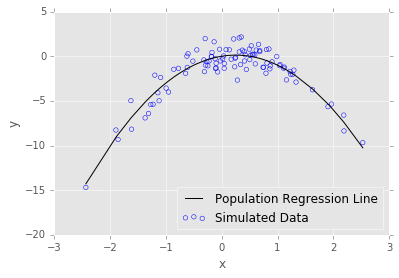

In [3]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x,y, label='Simulated Data', facecolors='none', edgecolors='b');
ax.plot(x,x-2*x**2, label='Population Regression Line', color='k');
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend(loc=4);

From the derivative of the model we find an extremum at x=0.25 and the second derivative is negative so x=0.25 is a maximum. The simulated data indeed appears to peak at x = 0.25.

## C-E. Compute LOOCV Errors for Polynomial Models 

We now will compute the LOOCV errors for 4 models with increasing order, using the mean-squared error score. We will use sklearn's PolynomialFeatures and cross_validation modules.

LOOCV ERRORS = [ 8.5263  1.0622  1.0739  1.0972]


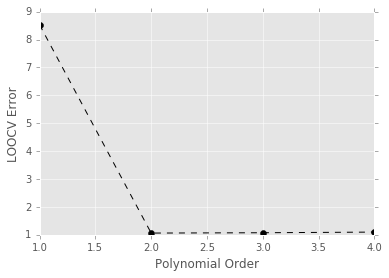

In [30]:
# Create LOOCV Func #
#####################
# Create a function returning LOOCV error for a degree polynomial transform of x given response y

def sim_loocv(predictor, degree, response):
    """
    Returns LOOCV error for a model using a poly transfom of predictor with integer order degree > 0, and response
    ex. response = 1 + beta0 + beta1*x + ... beta_degree*x**degree.
    """
    
    # generate Polynomial without constant column
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    # make linear regression model
    regress = LinearRegression()
    
    # with our model perform LOOCV. We negated the score results due to this issue
    # https://github.com/scikit-learn/scikit-learn/issues/2439

    return -np.mean(cross_validation.cross_val_score(regress, poly.fit_transform(predictor[:,np.newaxis]), 
                                            response, scoring='mean_squared_error',cv=len(predictor)))
       
# test it out
#print(sim_loocv(predictor=x, degree=2, response=y))

# Compute LOOCV for Polynomials Up To Order 4 #
###############################################
# Get the LOOCV error for each of the polynomials
np.random.seed(0)
LOOCV = [sim_loocv(x,degree, y) for degree in range(1,5)]

# Plot the LOOCV Errors For Each Polynomial Degree #
####################################################
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(list(range(1,5)),LOOCV, marker='o', linestyle='--', color='k');
ax.set_xlabel('Polynomial Order');
ax.set_ylabel('LOOCV Error');

print('LOOCV ERRORS =', np.array(LOOCV))


The LOOCV errors are minimum at Polynomial order 2. Makes sense since this is how the data was created. Also the LOOCV does not depend on seed because there is no randomness in how LOOCV is computed

## F. Compare LOOCV With Model P-Values

In [55]:
# Compute Coeffecient P-Values For Each Model #
###############################################
# create a design matrix upto order 4
X = sm.add_constant(np.column_stack((x,x**2,x**3,x**4)))

for degree in range(1, np.size(X, axis=1)):
    # Compute fit for this degree
    regress2 = sm.OLS(y, X[:,0:degree+1]).fit()
    # print p-values for betas 
    print('POLY DEGREE =', degree, '   P-VALUE(s) =', regress2.pvalues)

POLY DEGREE = 1    P-VALUE(s) = [  1.9685e-08   1.2877e-02]
POLY DEGREE = 2    P-VALUE(s) = [  8.5294e-01   5.9957e-16   1.1031e-44]
POLY DEGREE = 3    P-VALUE(s) = [  8.1120e-01   7.4044e-07   4.0806e-43   7.8602e-01]
POLY DEGREE = 4    P-VALUE(s) = [  6.3846e-01   7.3313e-07   5.9981e-16   8.6133e-01   5.9856e-01]


The most significant p-value is for the coeffecient of the $x^2$ terms in all the models (excepting the linear model). This agrees with the LOOCV results.